<a href="https://colab.research.google.com/github/AnusreeChittineni/VAIL_2021/blob/main/Sarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# unzips neccessarry zip files in Drive
# only needs to be run once for your Drive
!unzip -uq "/content/drive/MyDrive/Sarcasm_Headlines_Dataset.json.zip" -d "/content/drive/My Drive/SarcasmDetection"

In [1]:
import json

# reading data
def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

# intializes a list called data to store data
data = list(parse_data('/content/drive/MyDrive/SarcasmDetection/Sarcasm_Headlines_Dataset.json'))
print(data[0])

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}


In [2]:
# imports pandas database
import pandas as pd

# intializes pandas dataframe to store data
df = pd.DataFrame(data)
print(df.head())

                                        article_link  ... is_sarcastic
0  https://www.huffingtonpost.com/entry/versace-b...  ...            0
1  https://www.huffingtonpost.com/entry/roseanne-...  ...            0
2  https://local.theonion.com/mom-starting-to-fea...  ...            1
3  https://politics.theonion.com/boehner-just-wan...  ...            1
4  https://www.huffingtonpost.com/entry/jk-rowlin...  ...            0

[5 rows x 3 columns]


In [3]:
from sklearn.model_selection import train_test_split
import sklearn
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
import numpy as np

In [4]:
# initlaizes input and output values
x = df['headline'].values
y = df['is_sarcastic'].values

# splits data into training and testing groups
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
x_test, x_validate, y_test, y_validate = train_test_split(x_test, y_test, test_size=0.50)

# prints shape of data
print(x_train.shape, x_test.shape, x_validate.shape, y_train.shape, y_test.shape, y_validate.shape)

(18696,) (4006,) (4007,) (18696,) (4006,) (4007,)


In [13]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(x_train) 

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(x_train)
max_sequence_train = max(len(x) for x in training_sequences)
training_padded = np.array([np.pad(x, (0, max_sequence_train - len(x))) for x in training_sequences])
#training_padded = sequence.pad_sequences(training_sequences, maxlen=100, padding="post", truncating="post")

val_sequences = tokenizer.texts_to_sequences(x_validate)
max_sequence_val = max(len(x) for x in val_sequences)
val_padded = np.array([np.pad(x, (0, max_sequence_val - len(x))) for x in val_sequences])
#val_padded = sequence.pad_sequences(val_sequences, maxlen=100, padding="post", truncating="post")

testing_sequences = tokenizer.texts_to_sequences(x_test)
max_sequence_test = max(len(x) for x in testing_sequences)
testing_padded = np.array([np.pad(x, (0, max_sequence_test - len(x))) for x in testing_sequences])
#testing_padded = sequence.pad_sequences(testing_sequences, maxlen=100, padding="post", truncating="post")


In [14]:
training_padded = np.array(training_padded)
val_padded = np.array(val_padded)
testing_padded = np.array(testing_padded)
y_test = np.array(y_test)

In [15]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(len(word_index) + 1, 2, input_shape=[None]),
        tf.keras.layers.LSTM(50, return_sequences=False),
        tf.keras.layers.Dense(25, activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(5, activation="relu"),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 2)           49508     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                10600     
_________________________________________________________________
dense_8 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 61,704
Trainable params: 61,704
Non-trainable params: 0
__________________________________________________

In [16]:
# try with various optimizer and loss algorithms
# (SGD, MSE, 56), (Adam, MSE, 93), (Adam, BC, 97)
model.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics=['accuracy'])

history = model.fit(training_padded, y_train, validation_data=(val_padded, y_validate), 
          epochs=15, verbose=1)

Epoch 1/15
585/585 [==============================] - 6s 7ms/step - loss: 0.6877 - accuracy: 0.5528 - val_loss: 0.6864 - val_accuracy: 0.5588
Epoch 2/15
585/585 [==============================] - 4s 7ms/step - loss: 0.6825 - accuracy: 0.5750 - val_loss: 0.6677 - val_accuracy: 0.5857
Epoch 3/15
585/585 [==============================] - 4s 7ms/step - loss: 0.6222 - accuracy: 0.6275 - val_loss: 0.5347 - val_accuracy: 0.7769
Epoch 4/15
585/585 [==============================] - 4s 7ms/step - loss: 0.4449 - accuracy: 0.8336 - val_loss: 0.5061 - val_accuracy: 0.7951
Epoch 5/15
585/585 [==============================] - 4s 7ms/step - loss: 0.4127 - accuracy: 0.8242 - val_loss: 0.5270 - val_accuracy: 0.7392
Epoch 6/15
585/585 [==============================] - 4s 7ms/step - loss: 0.4129 - accuracy: 0.8115 - val_loss: 0.5151 - val_accuracy: 0.7699
Epoch 7/15
585/585 [==============================] - 4s 7ms/step - loss: 0.3473 - accuracy: 0.8685 - val_loss: 0.5320 - val_accuracy: 0.7946
Epoch 

In [20]:
results = model.evaluate(testing_padded, y_test)
print("test loss, test acc:", results)

predictions = model.predict(testing_padded)
predictions = np.argmax(predictions, axis=1)

#print(predictions)

# I don't understand why this line of code does not work
print(sklearn.metrics.accuracy_score(y_test, predictions, normalize=True))

126/126 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.8345
test loss, test acc: [0.49636679887771606, 0.8344982266426086]
0.5486769845232152


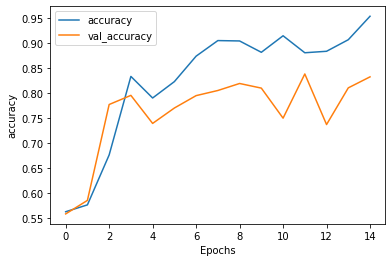

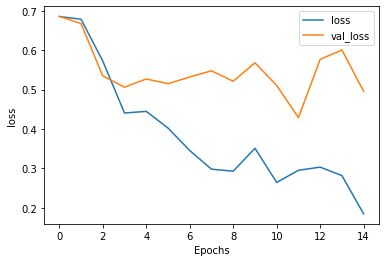

In [21]:
import matplotlib.pyplot as plt

def plot_data(model_history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_data(history, "accuracy")
plot_data(history, "loss")
